# Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
df_Mark = pd.read_excel("C:\\Users\\SARVESH SURVE\\Onedrive\\Desktop\\data\\Excelr.dataset\\marketing_campaign1 (1).xlsx")

In [3]:
df_Mark.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# DATA CLEANING

In [4]:
df_Mark.shape

(2240, 29)

In [5]:
df_Mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [6]:
df_Mark.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
df_Mark.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [8]:
df_Mark.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
# Imputing missing values with the mean
mean_income = np.mean(df_Mark['Income'])
df_Mark['Income'].fillna(mean_income, inplace=True)

In [10]:
#To remove the NA values
df_Mark = df_Mark.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df_Mark))

The total number of data-points after removing the rows with missing values are: 2240


In [11]:
df_Mark.duplicated().sum()

0

In [12]:
df_Mark["Dt_Customer"] = pd.to_datetime(df_Mark["Dt_Customer"])
dates = []
for i in df_Mark["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))


The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [13]:
 #Feature Engineering
current_year = datetime.datetime.now().year
df_Mark['Age'] = current_year - df_Mark['Year_Birth']

* **creating a new feature called "Age" by subtracting the "Year_Birth" column from the current year. This helps in analyzing the customer's age and its relationship with other features in the dataset.**

In [14]:
df_Mark.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,42


In [15]:
#Droppig 'Year_Birth column'
df_Mark = df_Mark.drop(['Year_Birth'],axis = 1)

In [16]:
# Moving the Age column to the first position
age_col = df_Mark.pop('Age')
df_Mark.insert(0, 'Age', age_col)

In [17]:
df_Mark.head()

,Age,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,66,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,69,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,58,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,39,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,42,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [18]:
#Deriving living situation by marital status"Alone"
df_Mark["Living_With"]=df_Mark["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
#Feature indicating total children living in the household
df_Mark["Children"]=df_Mark["Kidhome"]+df_Mark["Teenhome"]
#Segmenting education levels in three groups
df_Mark["Education"]=df_Mark["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
#For clarity
df_Mark=df_Mark.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "ID"]
df_Mark = df_Mark.drop(to_drop, axis=1)

* **Deriving living situation by marital status, with "Alone" indicating customers who are not married, in a partnership, or a widow.**
* **Adding a feature indicating the total number of children living in the household by summing up "Kidhome" and "Teenhome".**
* **Segmenting education levels into three groups: "Undergraduate" for "Basic" and "2n Cycle", "Graduate" for "Graduation", and "Postgraduate" for "Master" and "PhD".**
* **Renaming some features for clarity: "MntWines" to "Wines", "MntFruits" to "Fruits", "MntMeatProducts" to "Meat", "MntFishProducts" to "Fish", "MntSweetProducts" to "Sweets", and "MntGoldProds" to "Gold".**
* **Dropping some of the redundant features, including "Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", and "ID".**

In [19]:
df_Mark.head()

,Age,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Living_With,Children
0,66,Graduate,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,1,Alone,0
1,69,Graduate,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,Alone,2
2,58,Graduate,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,0,Partner,0
3,39,Graduate,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,0,Partner,1
4,42,Postgraduate,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,0,Partner,1


In [20]:
df_Mark['Age'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

In [21]:
# define age category bins and labels
bins = [0, 40, 60, 130]
labels = ['Young Adult', 'Mid Age Adult', 'Older Adult']

# create age category column
df_Mark['age_category'] = pd.cut(df_Mark['Age'], bins=bins, labels=labels)

# view the updated dataframe
print(df_Mark[['age_category']])

       age_category
0       Older Adult
1       Older Adult
2     Mid Age Adult
3       Young Adult
4     Mid Age Adult
...             ...
2235  Mid Age Adult
2236    Older Adult
2237  Mid Age Adult
2238    Older Adult
2239    Older Adult

[2240 rows x 1 columns]


* **We defined age category bins and labels using the bins and labels variables. In this case, we set three age category bins: "Young Adult" for ages below 40, "Mid Age Adult" for ages between 40 and 60, and "Older Adult" for ages above 60.**
* **With this feature engineering step, we can now analyze our customers based on their age categories and how they relate to other features in the dataset.**

In [22]:
df_Mark.describe(include="all")

,Age,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Living_With,Children,age_category
count,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,3
top,NaN,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partner,NaN,Mid Age Adult
freq,NaN,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1444,NaN,1240
mean,54.194196,NaN,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,NaN,0.950446,NaN
std,11.984069,NaN,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,NaN,0.751803,NaN
min,27.000000,NaN,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,46.000000,NaN,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
50%,53.000000,NaN,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN
75%,64.000000,NaN,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN


**The above stats show some discrepancies in mean Income and Age and max Income and age.
Do note that max-age is 130 years, As I calculated the age that would be today (i.e. 2023) and the data is old.
I must take a look at the broader view of the data. I will plot some of the selected features**

# **==============================================================================================================================**

# EDA 

# EDA On Demographic Information

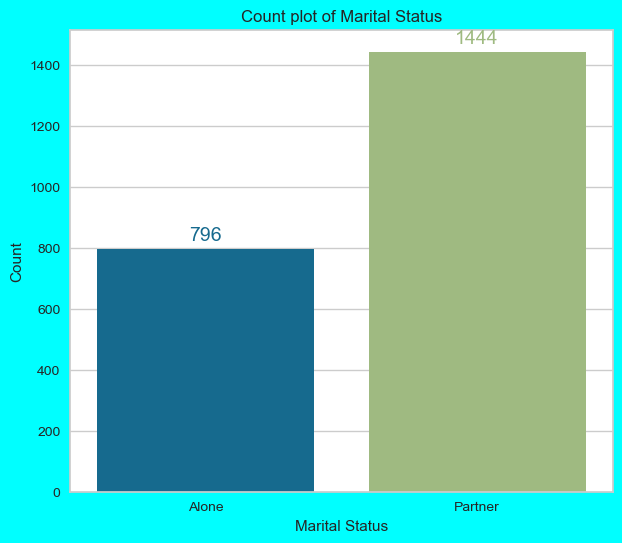

In [23]:
plt.figure(figsize=(7, 6),facecolor='cyan')
ax = sns.countplot(data=df_Mark, x='Living_With')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count plot of Marital Status')
plt.show()

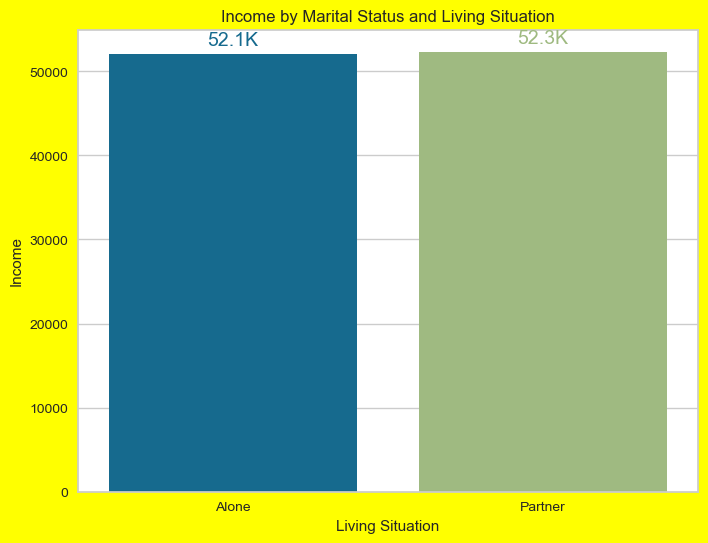

In [24]:
plt.figure(figsize=(8,6),facecolor='Yellow')
ax=sns.barplot(data=df_Mark, x='Living_With', y='Income', ci=None)
for p in ax.patches:
    ax.annotate('{:.1f}K'.format(p.get_height()/ 1000), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', xytext = (0, 10), 
            textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.title('Income by Marital Status and Living Situation')
plt.xlabel('Living Situation')
plt.ylabel('Income')
plt.show()

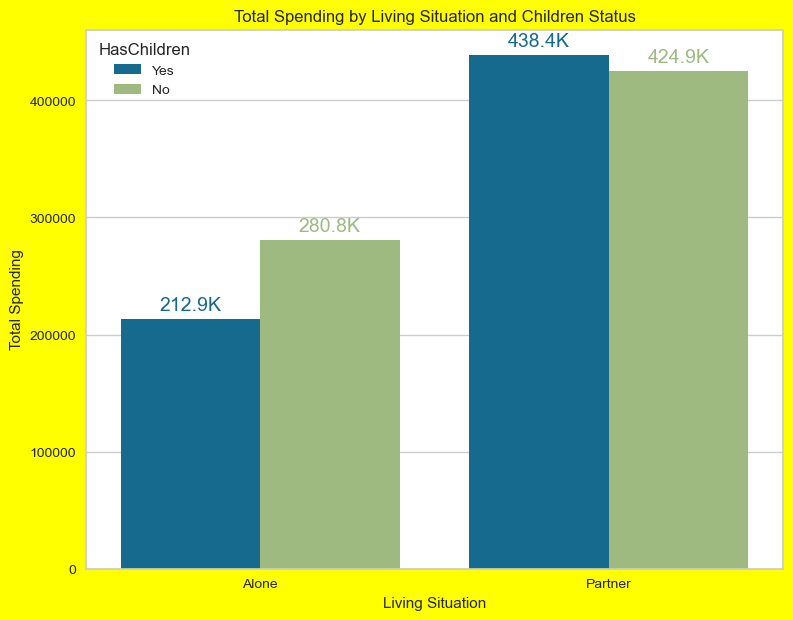

In [25]:
df_Mark['TotalSpent'] = df_Mark['Wines'] + df_Mark['Fruits'] + df_Mark['Meat'] + df_Mark['Fish'] + df_Mark['Sweets'] + df_Mark['Gold']

# Creating a dataframe of those who have children
have_children = df_Mark[df_Mark['Children'] > 0]
have_children['HasChildren'] = 'Yes'

# Calculating the total spent by those who have children
have_children_spending = have_children.groupby(['Living_With', 'HasChildren'])['TotalSpent'].sum().reset_index()

# Creating a dataframe of those who don't have children
no_children = df_Mark[df_Mark['Children'] == 0]
no_children['HasChildren'] = 'No'

# Calculating the total spent by those who don't have children
no_children_spending = no_children.groupby(['Living_With', 'HasChildren'])['TotalSpent'].sum().reset_index()

# Concatenating the two dataframes
spending_comparison = pd.concat([have_children_spending, no_children_spending])

fig = plt.figure(figsize=(9,7),facecolor='yellow')
ax = sns.barplot(data=spending_comparison, x='Living_With', y='TotalSpent', hue='HasChildren')
for p in ax.patches:
    ax.annotate('{:.1f}{}'.format(p.get_height() / 1000, 'K'), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', xytext = (0, 10), 
            textcoords = 'offset points', fontsize=14, color=p.get_facecolor())

plt.title('Total Spending by Living Situation and Children Status')
plt.xlabel('Living Situation')
plt.ylabel('Total Spending')

plt.show()

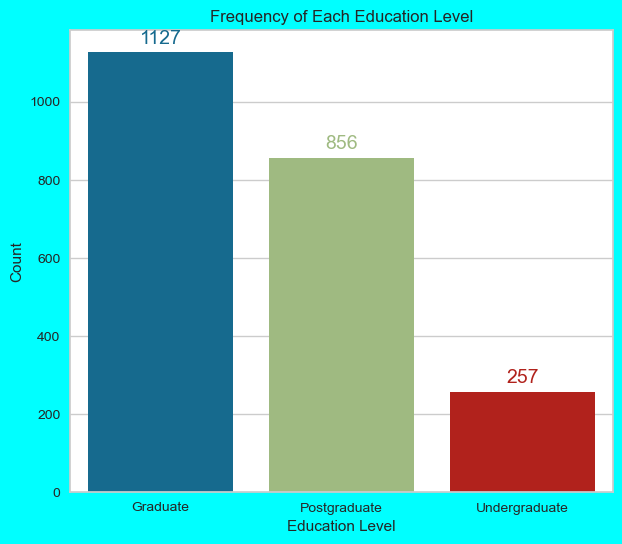

In [26]:
plt.figure(figsize=(7, 6),facecolor='cyan')
ax = sns.countplot(data=df_Mark, x='Education')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
    
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Frequency of Each Education Level')
plt.show()

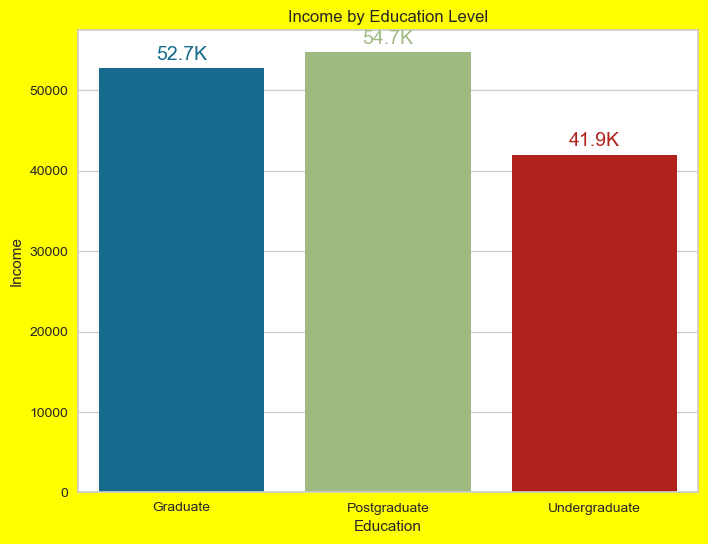

In [27]:
plt.figure(figsize=(8,6),facecolor='Yellow')
ax=sns.barplot(data=df_Mark, x='Education', y='Income', ci=None)
for p in ax.patches:
    ax.annotate('{:.1f}K'.format(p.get_height()/ 1000), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', xytext = (0, 10), 
            textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.title('Income by Education Level')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

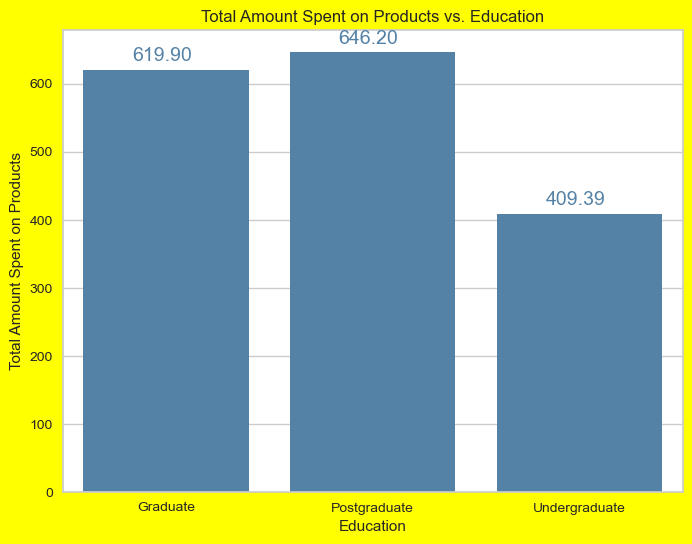

In [28]:
figure = plt.figure(figsize=(8,6),facecolor='yellow')
ax = sns.barplot(x='Education', y='TotalSpent', data=df_Mark, ci=None, color='steelblue')
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2.1, p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.title('Total Amount Spent on Products vs. Education')
plt.xlabel('Education')
plt.ylabel('Total Amount Spent on Products')
plt.show()

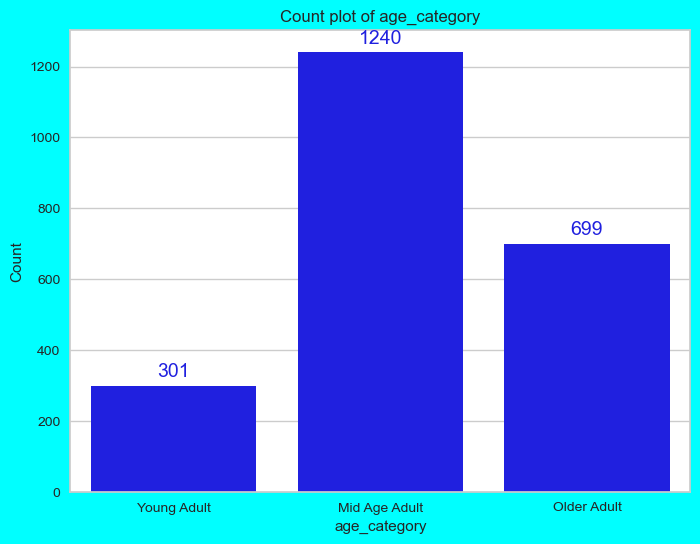

In [29]:
plt.figure(figsize=(8, 6),facecolor='cyan')
ax = sns.countplot(data=df_Mark, x='age_category',color='blue')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())

plt.xlabel('age_category')
plt.ylabel('Count')
plt.title('Count plot of age_category')

plt.show()

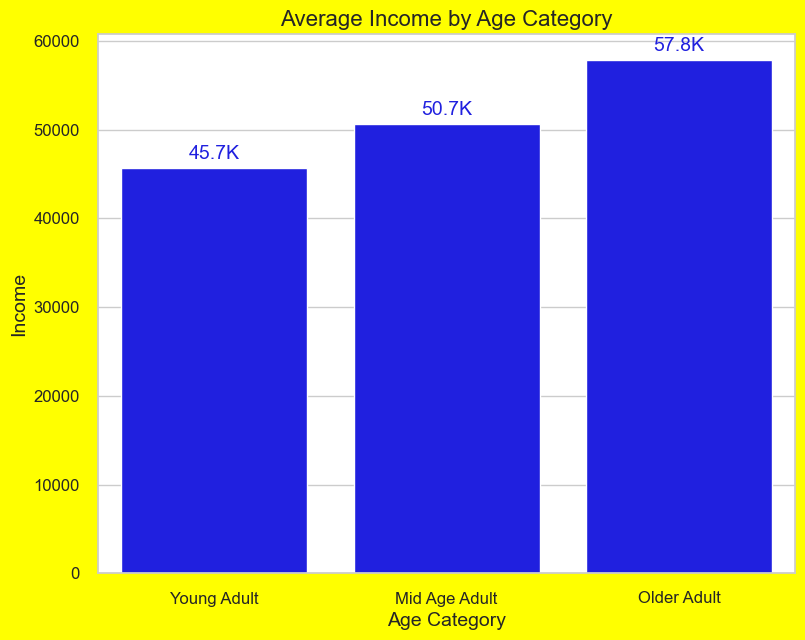

In [30]:
income_by_age = df_Mark.groupby('age_category')['Income'].mean()

plt.figure(figsize=(9,7), facecolor='Yellow')
sns.set(style='whitegrid')
ax = sns.barplot(x=income_by_age.index, y=income_by_age.values, color='blue')
for p in ax.patches:
    ax.annotate('{:.1f}K'.format(p.get_height()/ 1000), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', xytext = (0, 10), 
            textcoords = 'offset points', fontsize=14, color=p.get_facecolor())

plt.xlabel('Age Category', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Average Income by Age Category', fontsize=16)
plt.show()

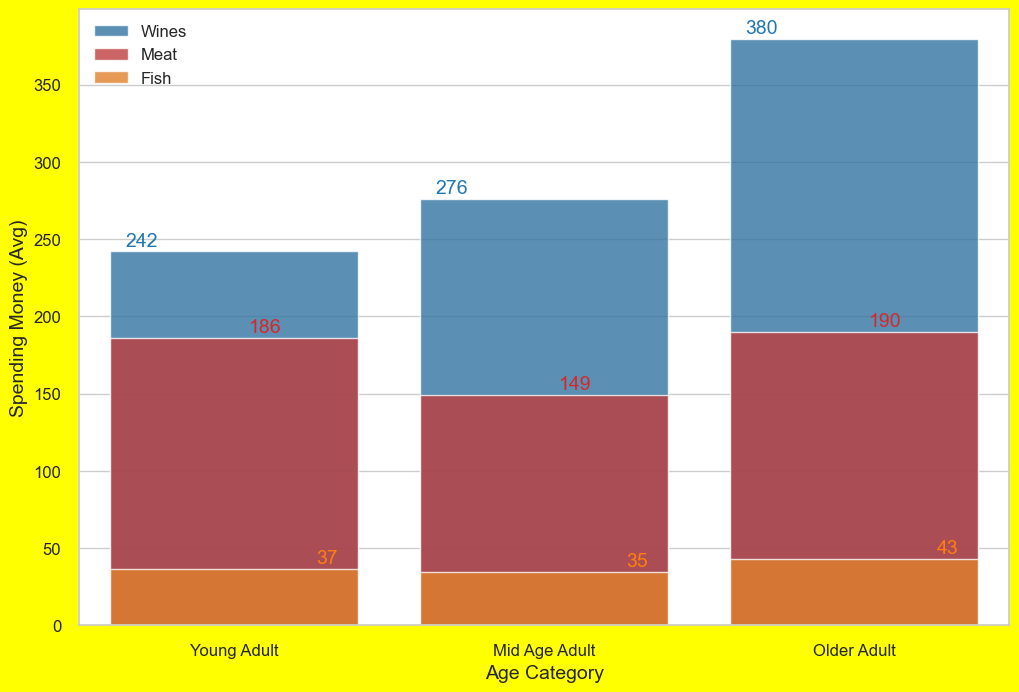

In [31]:
# group data by age category and calculat the mean spending money
spending_money = df_Mark.groupby('age_category')[['Wines','Meat', 'Fish']].mean()


sns.set(style='whitegrid')
plt.figure(figsize=(12,8),facecolor='yellow')
ax = sns.barplot(x=spending_money.index, y=spending_money['Wines'], color='#1f77b4', alpha=0.8, label='Wines')
sns.barplot(x=spending_money.index, y=spending_money['Meat'], color='#d62728', alpha=0.8, label='Meat')
sns.barplot(x=spending_money.index, y=spending_money['Fish'], color='#ff7f0e', alpha=0.8, label='Fish')
plt.xlabel('Age Category', fontsize=14)
plt.ylabel('Spending Money (Avg)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=12)

for i, v in enumerate(spending_money['Wines']):
    ax.text(i-0.3, v+1, str(round(v)), ha='center', va='bottom', fontsize=14,color='#1f77b4')
for i, v in enumerate(spending_money['Meat']):
    ax.text(i+0.1, v+1, str(round(v)), ha='center', va='bottom', fontsize=14,color='#d62728')
for i, v in enumerate(spending_money['Fish']):
    ax.text(i+0.3, v+1, str(round(v)), ha='center', va='bottom', fontsize=14,color='#ff7f0e')

plt.show()

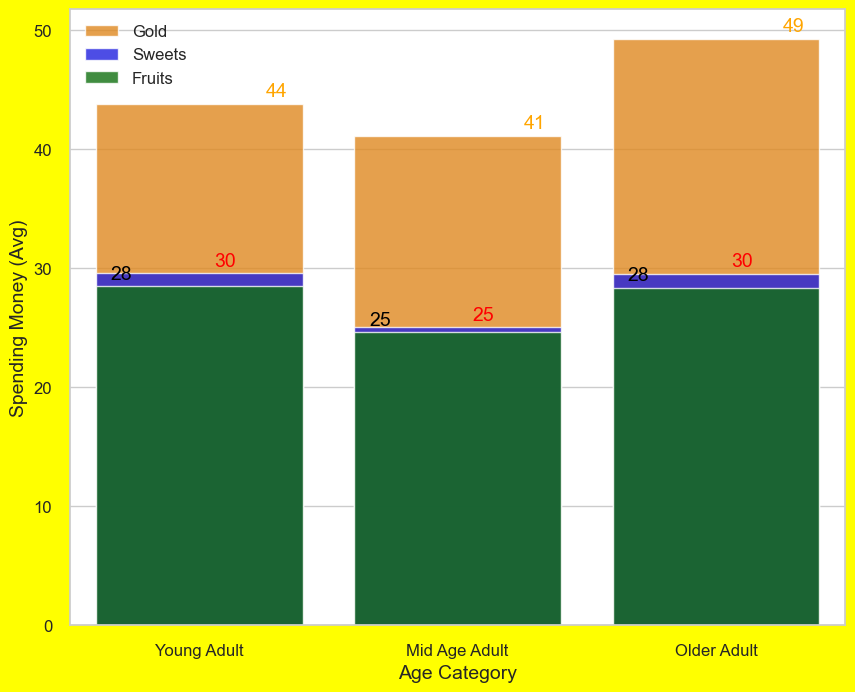

In [32]:
spending_money = df_Mark.groupby('age_category')[['Fruits','Sweets', 'Gold']].mean()

sns.set(style='whitegrid')
plt.figure(figsize=(10,8),facecolor='yellow')
ax=sns.barplot(x=spending_money.index, y=spending_money['Gold'], color='Darkorange', alpha=0.8, label='Gold')
sns.barplot(x=spending_money.index, y=spending_money['Sweets'], color='blue', alpha=0.8, label='Sweets')
sns.barplot(x=spending_money.index, y=spending_money['Fruits'], color='green', alpha=0.8, label='Fruits')
plt.xlabel('Age Category', fontsize=14)
plt.ylabel('Spending Money (Avg)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=12)


for i, v in enumerate(spending_money['Fruits']):
    ax.text(i-0.3, v+1, str(round(v)), ha='center', va='center', fontsize=14,color='black')
for i, v in enumerate(spending_money['Sweets']):
    ax.text(i+0.1, v+1, str(round(v)), ha='center', va='center', fontsize=14,color='red')
for i, v in enumerate(spending_money['Gold']):
    ax.text(i+0.3, v+1, str(round(v)), ha='center', va='center', fontsize=14,color='orange')

plt.show()

# __Behavioral Attributes__

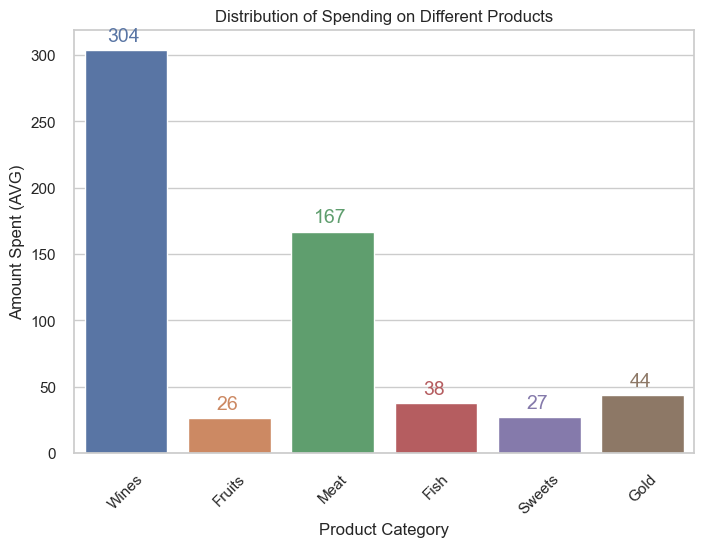

In [33]:
product_cols = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
ax = sns.barplot(data=df_Mark[product_cols],ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2.1, p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Amount Spent (AVG)')
plt.title('Distribution of Spending on Different Products')
plt.show()

In [34]:
corr = df_Mark[['Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].corr()
corr

,Income,Wines,Fruits,Meat,Fish,Sweets,Gold
Income,1.000000,0.576789,0.428747,0.577802,0.437497,0.436162,0.321978
Wines,0.576789,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516
Fruits,0.428747,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995
Meat,0.577802,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609
Fish,0.437497,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875
Sweets,0.436162,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724
Gold,0.321978,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000


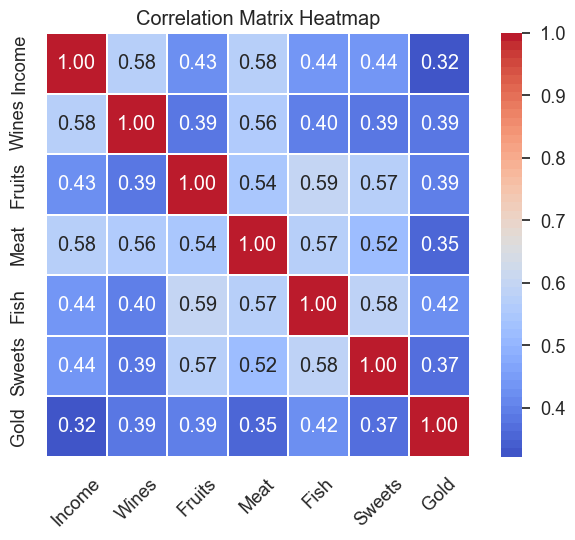

In [35]:
cmap = sns.color_palette('coolwarm', 50)
sns.set(font_scale=1.2)
sns.heatmap(corr, annot=True, cmap=cmap, linewidths=0.3, square=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.show()

<Figure size 600x600 with 0 Axes>

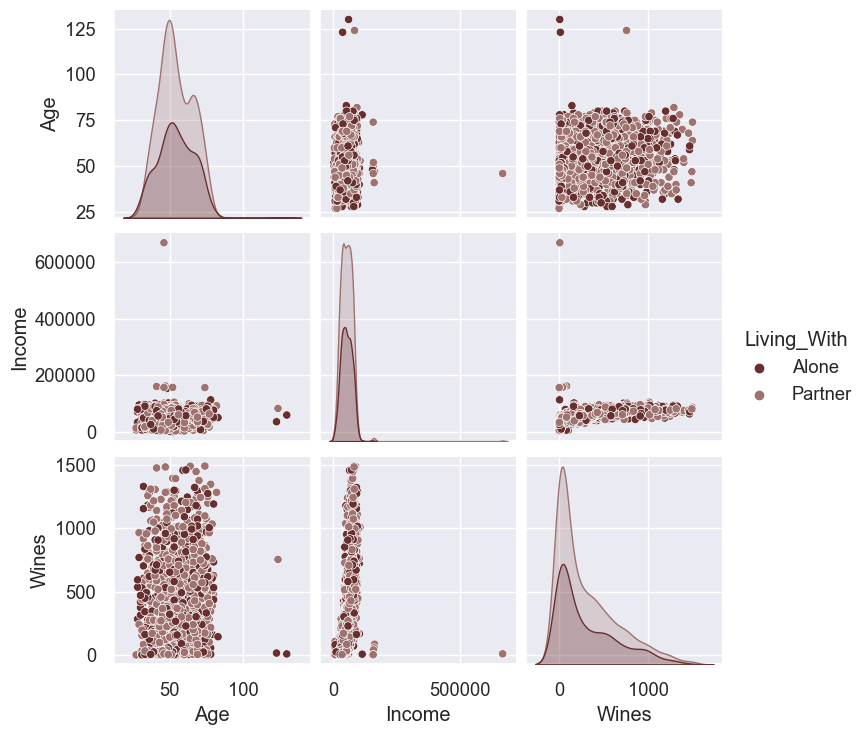

In [36]:
from matplotlib import colors
cmap = colors.ListedColormap(["#682F2F", "#9E726F"])
plt.figure(figsize=(6,6))
sns.pairplot(df_Mark, vars=['Age', 'Income', 'Wines'], hue='Living_With', palette=cmap.colors)
plt.show()

Text(0.5, 0.92, 'Customer Spending on Wine, Meat, and Fish Products by Complain Status')

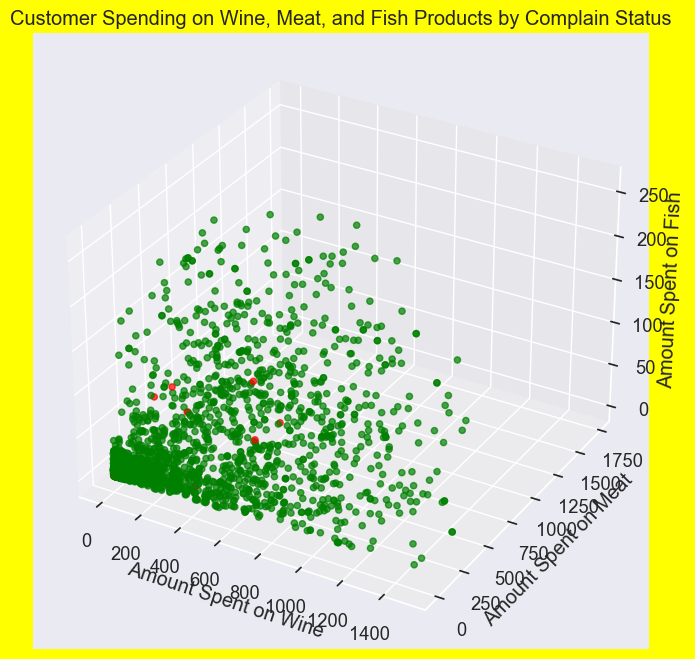

In [37]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8),facecolor ='Yellow')
ax = fig.add_subplot(111, projection='3d')

# Set the color of each data point based on 'Complain' attribute
colors = ['green' if c == 0 else 'red' for c in df_Mark['Complain']]
ax.scatter(df_Mark['Wines'], df_Mark['Meat'], df_Mark['Fish'], c=colors, alpha=0.7)

# Set axis labels and title
ax.set_xlabel('Amount Spent on Wine')
ax.set_ylabel('Amount Spent on Meat')
ax.set_zlabel('Amount Spent on Fish')
ax.set_title('Customer Spending on Wine, Meat, and Fish Products by Complain Status')

# Promotional Activities

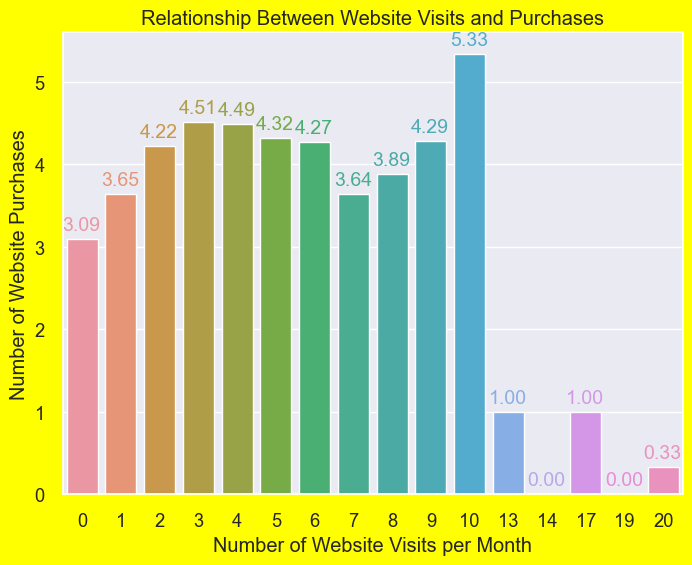

In [38]:
fig = plt.figure(figsize=(8, 6),facecolor ='Yellow')
ax = sns.barplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df_Mark,ci=None)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2.1, p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.xlabel('Number of Website Visits per Month')
plt.ylabel('Number of Website Purchases')
plt.title('Relationship Between Website Visits and Purchases')
plt.show()

<Figure size 1000x600 with 0 Axes>

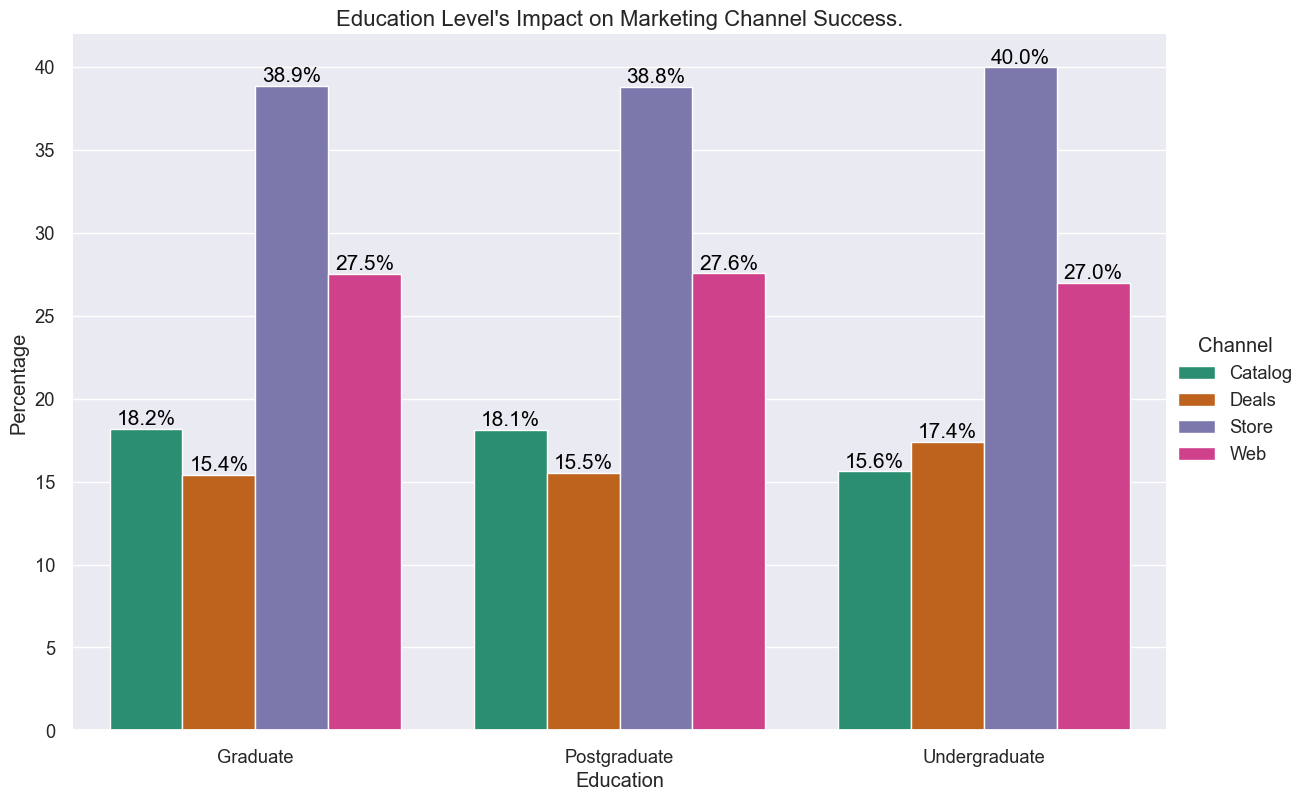

In [39]:


df_Education = pd.melt(df_Mark, id_vars=["Education"], value_vars=["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"], var_name="Channel", value_name="Purchases")
df_Education["Channel"] = df_Education["Channel"].replace({"NumDealsPurchases": "Deals", "NumWebPurchases": "Web", "NumCatalogPurchases": "Catalog", "NumStorePurchases": "Store"})
df_Education = df_Education.groupby(["Education", "Channel"]).sum().reset_index()
df_Education["Percentage"] = df_Education.groupby("Education")["Purchases"].apply(lambda x: x / x.sum() * 100)


sns.set_palette("Dark2")
figure = plt.figure(figsize=(10, 6), facecolor='yellow')
g = sns.catplot(
    x="Education", 
    y="Percentage", 
    hue="Channel", 
    data=df_Education, 
    kind="bar", 
    palette="Dark2",
    height=8, 
    aspect=1.5
)
g.despine(left=True)
g.set_ylabels("Percentage")
g.set_xlabels("Education")

for ax in g.axes.flat:
    for p in ax.containers:
        for rect in p.patches:
            ax.text(rect.get_x() + rect.get_width() / 2., rect.get_height(), '{:.1f}%'.format(rect.get_height()),
                    fontsize=15, color='black', ha='center', va='bottom')
plt.title("Education Level's Impact on Marketing Channel Success.", fontsize=16)
plt.show()

<Figure size 1000x600 with 0 Axes>

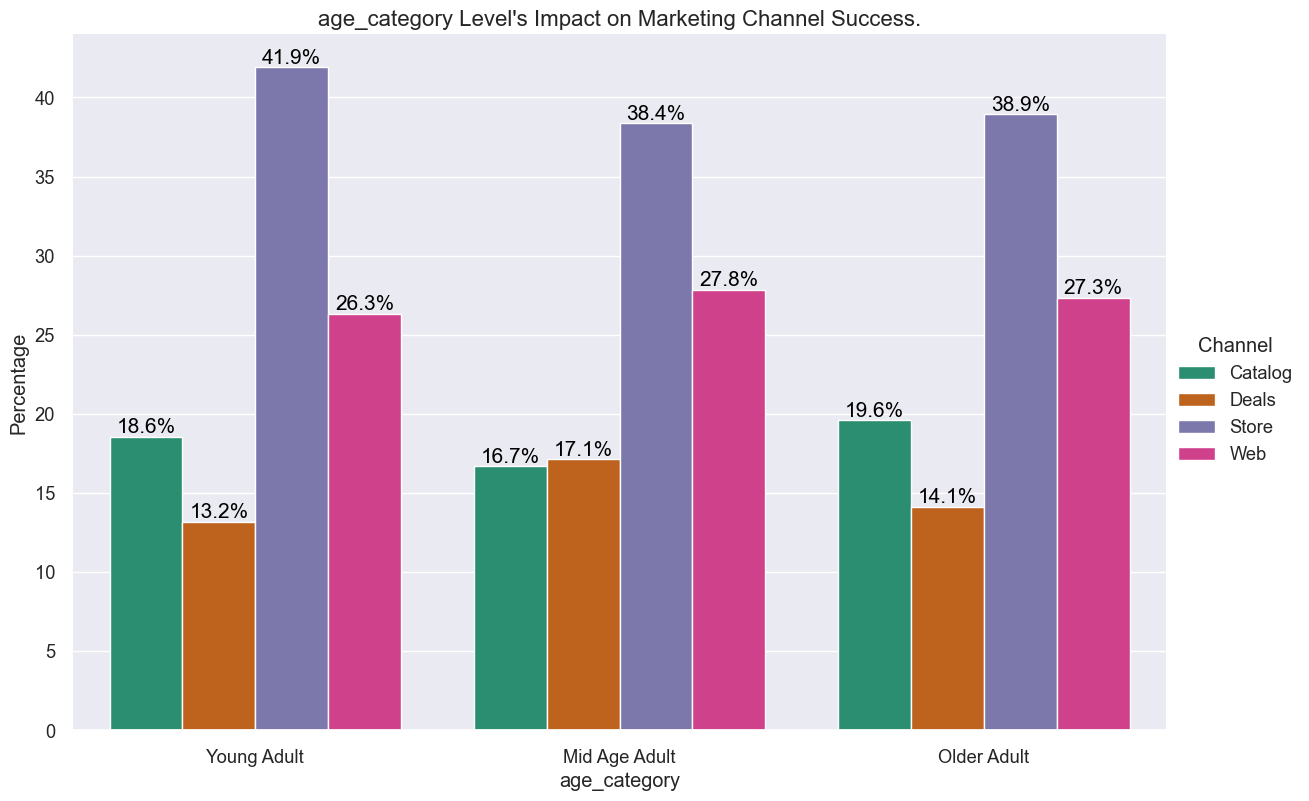

In [40]:
df_age_category = pd.melt(df_Mark, id_vars=["age_category"], value_vars=["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"], var_name="Channel", value_name="Purchases")
df_age_category["Channel"] = df_age_category["Channel"].replace({"NumDealsPurchases": "Deals", "NumWebPurchases": "Web", "NumCatalogPurchases": "Catalog", "NumStorePurchases": "Store"})
df_age_category = df_age_category.groupby(["age_category", "Channel"]).sum().reset_index()
df_age_category["Percentage"] = df_age_category.groupby("age_category")["Purchases"].apply(lambda x: x / x.sum() * 100)


sns.set_palette("Dark2")
figure = plt.figure(figsize=(10, 6), facecolor='yellow')
g = sns.catplot(
    x="age_category", 
    y="Percentage", 
    hue="Channel", 
    data=df_age_category, 
    kind="bar", 
    palette="Dark2",
    height=8, 
    aspect=1.5
)
g.despine(left=True)
g.set_ylabels("Percentage")
g.set_xlabels("age_category")

for ax in g.axes.flat:
    for p in ax.containers:
        for rect in p.patches:
            ax.text(rect.get_x() + rect.get_width() / 2., rect.get_height(), '{:.1f}%'.format(rect.get_height()),
                    fontsize=15, color='black', ha='center', va='bottom')
plt.title("age_category Level's Impact on Marketing Channel Success.", fontsize=16)
plt.show()

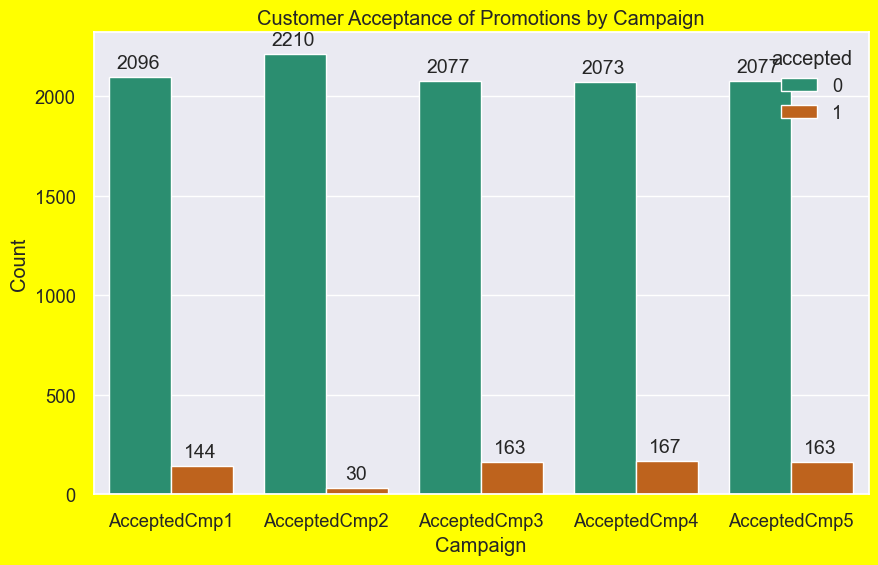

In [41]:
# Create a subset of the DataFrame with the desired columns
promo_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Reshape the data into a long format
promo_data = pd.melt(df_Mark[promo_cols], var_name='campaign', value_name='accepted')

fig = plt.figure(figsize=(10, 6),facecolor ='Yellow')
ax = sns.countplot(x='campaign', hue='accepted', data=promo_data)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2.1, p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14)

plt.xlabel('Campaign')
plt.ylabel('Count')
plt.title('Customer Acceptance of Promotions by Campaign')
plt.show()

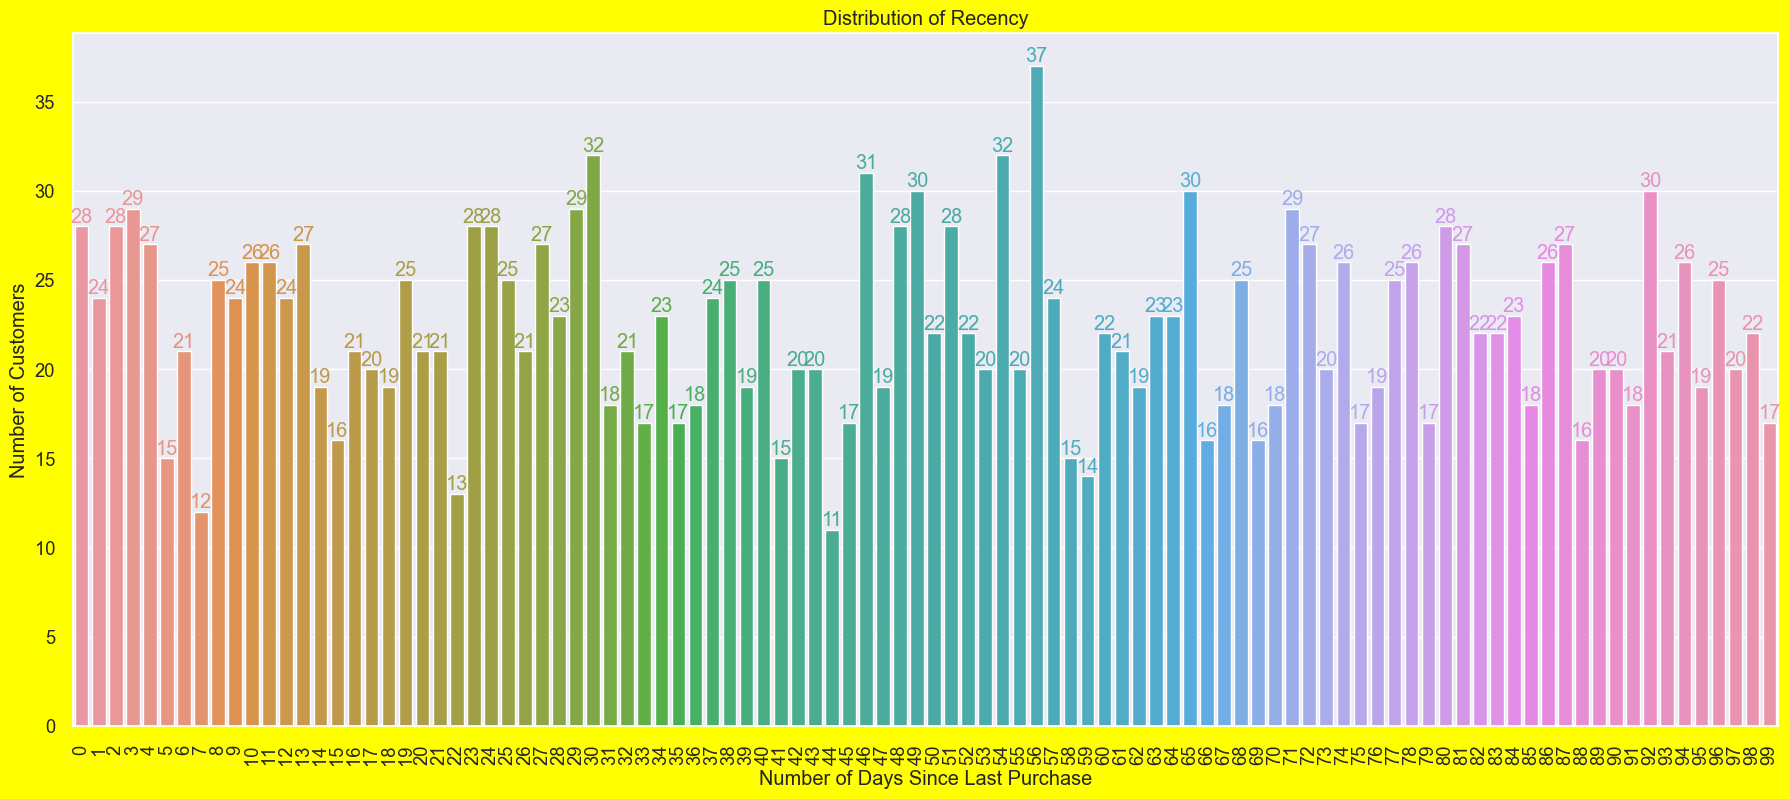

In [42]:
# Create count plot with 'Recency' on the x-axis
plt.figure(figsize=(22,9),facecolor='Yellow')
sns.countplot(data=df_Mark, x='Recency')

plt.xlabel('Number of Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.title('Distribution of Recency')
plt.xticks(rotation=90)

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2, height, int(height), ha='center', va='bottom',color=p.get_facecolor())
plt.show()

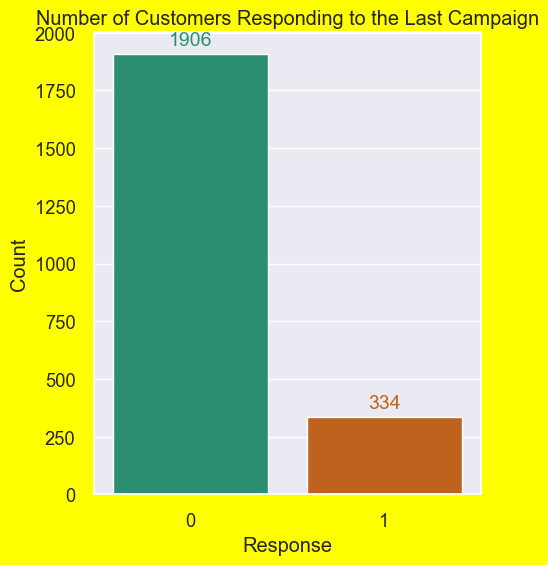

In [43]:

# Countplot for Response
plt.figure(figsize=(5, 6),facecolor='yellow')
# Create the count plot
ax = sns.countplot(data=df_Mark, x='Response')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Number of Customers Responding to the Last Campaign')
plt.show()

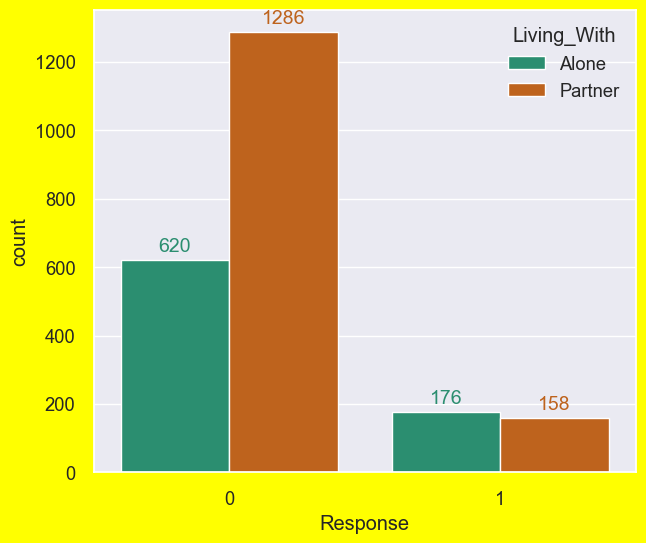

In [44]:
plt.figure(figsize=(7,6),facecolor='yellow')
ax=sns.countplot(x='Response', hue='Living_With', data=df_Mark)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.show()

In [45]:
# Create a new column called "NumChildren"
df_Mark['NumChildren'] = df_Mark['Kidhome'] + df_Mark['Teenhome'] + df_Mark['Children']

# Drop the original columns
df_Mark.drop(['Kidhome', 'Teenhome', 'Children'], axis=1, inplace=True)

# Check the updated dataset
print(df_Mark.head())

   Age     Education   Income  Recency  Wines  Fruits  Meat  Fish  Sweets  \
0   66      Graduate  58138.0       58    635      88   546   172      88   
1   69      Graduate  46344.0       38     11       1     6     2       1   
2   58      Graduate  71613.0       26    426      49   127   111      21   
3   39      Graduate  26646.0       26     11       4    20    10       3   
4   42  Postgraduate  58293.0       94    173      43   118    46      27   

   Gold  ...  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0    88  ...             0             0             0             0   
1     6  ...             0             0             0             0   
2    42  ...             0             0             0             0   
3     5  ...             0             0             0             0   
4    15  ...             0             0             0             0   

   Complain  Response  Living_With   age_category  TotalSpent  NumChildren  
0         0         1      

In [46]:
# Create a new column for the total number of campaigns accepted by the customer
df_Mark['TotalCampaignsAccepted'] = df_Mark['AcceptedCmp1'] + df_Mark['AcceptedCmp2'] + df_Mark['AcceptedCmp3'] + df_Mark['AcceptedCmp4'] + df_Mark['AcceptedCmp5']
df_Mark.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis=1, inplace=True)
df_Mark.head()


,Age,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Living_With,age_category,TotalSpent,NumChildren,TotalCampaignsAccepted
0,66,Graduate,58138.0,58,635,88,546,172,88,88,...,10,4,7,0,1,Alone,Older Adult,1617,0,0
1,69,Graduate,46344.0,38,11,1,6,2,1,6,...,1,2,5,0,0,Alone,Older Adult,27,4,0
2,58,Graduate,71613.0,26,426,49,127,111,21,42,...,2,10,4,0,0,Partner,Mid Age Adult,776,0,0
3,39,Graduate,26646.0,26,11,4,20,10,3,5,...,0,4,6,0,0,Partner,Young Adult,53,2,0
4,42,Postgraduate,58293.0,94,173,43,118,46,27,15,...,3,6,5,0,0,Partner,Mid Age Adult,422,2,0


In [47]:
df_Mark['TotalCampaignsAccepted'].value_counts()

0    1777
1     325
2      83
3      44
4      11
Name: TotalCampaignsAccepted, dtype: int64

In [48]:
df_Mark["Education"] = df_Mark["Education"].replace({"Basic": "Undergraduate", "2n Cycle": "Undergraduate", "Graduation": "Postgraduate", "Master": "Postgraduate", "PhD": "Postgraduate"})


In [49]:
df_Mark.columns

Index(['Age', 'Education', 'Income', 'Recency', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Living_With', 'age_category', 'TotalSpent',
       'NumChildren', 'TotalCampaignsAccepted'],
      dtype='object')

In [50]:
to_drop = ['Wines','Fruits','Meat','Fish','Sweets','Gold']
df_Mark = df_Mark.drop(to_drop, axis = 1)
df_Mark.head()

,Age,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Living_With,age_category,TotalSpent,NumChildren,TotalCampaignsAccepted
0,66,Graduate,58138.0,58,3,8,10,4,7,0,1,Alone,Older Adult,1617,0,0
1,69,Graduate,46344.0,38,2,1,1,2,5,0,0,Alone,Older Adult,27,4,0
2,58,Graduate,71613.0,26,1,8,2,10,4,0,0,Partner,Mid Age Adult,776,0,0
3,39,Graduate,26646.0,26,2,2,0,4,6,0,0,Partner,Young Adult,53,2,0
4,42,Postgraduate,58293.0,94,5,5,3,6,5,0,0,Partner,Mid Age Adult,422,2,0


In [51]:
df_Mark.columns

Index(['Age', 'Education', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'Living_With',
       'age_category', 'TotalSpent', 'NumChildren', 'TotalCampaignsAccepted'],
      dtype='object')

In [52]:
df_Mark['Living_Status'] = 'Alone'
df_Mark.loc[(df_Mark['Living_With'] == 'Partner') & (df_Mark['NumChildren'] > 0), 'Living_Status'] = 'Partner with Children'
df_Mark.loc[(df_Mark['Living_With'] == 'Partner') & (df_Mark['NumChildren'] == 0), 'Living_Status'] = 'Partner without Children'
df_Mark.drop(['Living_With', 'NumChildren'], axis=1, inplace=True)


In [53]:
df_Mark.head()

,Age,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,age_category,TotalSpent,TotalCampaignsAccepted,Living_Status
0,66,Graduate,58138.0,58,3,8,10,4,7,0,1,Older Adult,1617,0,Alone
1,69,Graduate,46344.0,38,2,1,1,2,5,0,0,Older Adult,27,0,Alone
2,58,Graduate,71613.0,26,1,8,2,10,4,0,0,Mid Age Adult,776,0,Partner without Children
3,39,Graduate,26646.0,26,2,2,0,4,6,0,0,Young Adult,53,0,Partner with Children
4,42,Postgraduate,58293.0,94,5,5,3,6,5,0,0,Mid Age Adult,422,0,Partner with Children


In [54]:
df_Mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     2240 non-null   int64   
 1   Education               2240 non-null   object  
 2   Income                  2240 non-null   float64 
 3   Recency                 2240 non-null   int64   
 4   NumDealsPurchases       2240 non-null   int64   
 5   NumWebPurchases         2240 non-null   int64   
 6   NumCatalogPurchases     2240 non-null   int64   
 7   NumStorePurchases       2240 non-null   int64   
 8   NumWebVisitsMonth       2240 non-null   int64   
 9   Complain                2240 non-null   int64   
 10  Response                2240 non-null   int64   
 11  age_category            2240 non-null   category
 12  TotalSpent              2240 non-null   int64   
 13  TotalCampaignsAccepted  2240 non-null   int64   
 14  Living_Status           

In [55]:
# Create a new column 'TotalPurchases'
df_Mark['TotalPurchases'] = df_Mark['NumDealsPurchases'] + df_Mark['NumWebPurchases'] + df_Mark['NumCatalogPurchases'] + df_Mark['NumStorePurchases']

# Drop the individual purchase columns
df_Mark.drop(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], axis=1, inplace=True)

# Rename the 'NumWebVisitsMonth' column to 'WebsiteVisits'
df_Mark.rename(columns={'NumWebVisitsMonth': 'WebsiteVisits'}, inplace=True)


In [56]:
df_Mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     2240 non-null   int64   
 1   Education               2240 non-null   object  
 2   Income                  2240 non-null   float64 
 3   Recency                 2240 non-null   int64   
 4   WebsiteVisits           2240 non-null   int64   
 5   Complain                2240 non-null   int64   
 6   Response                2240 non-null   int64   
 7   age_category            2240 non-null   category
 8   TotalSpent              2240 non-null   int64   
 9   TotalCampaignsAccepted  2240 non-null   int64   
 10  Living_Status           2240 non-null   object  
 11  TotalPurchases          2240 non-null   int64   
dtypes: category(1), float64(1), int64(8), object(2)
memory usage: 194.9+ KB


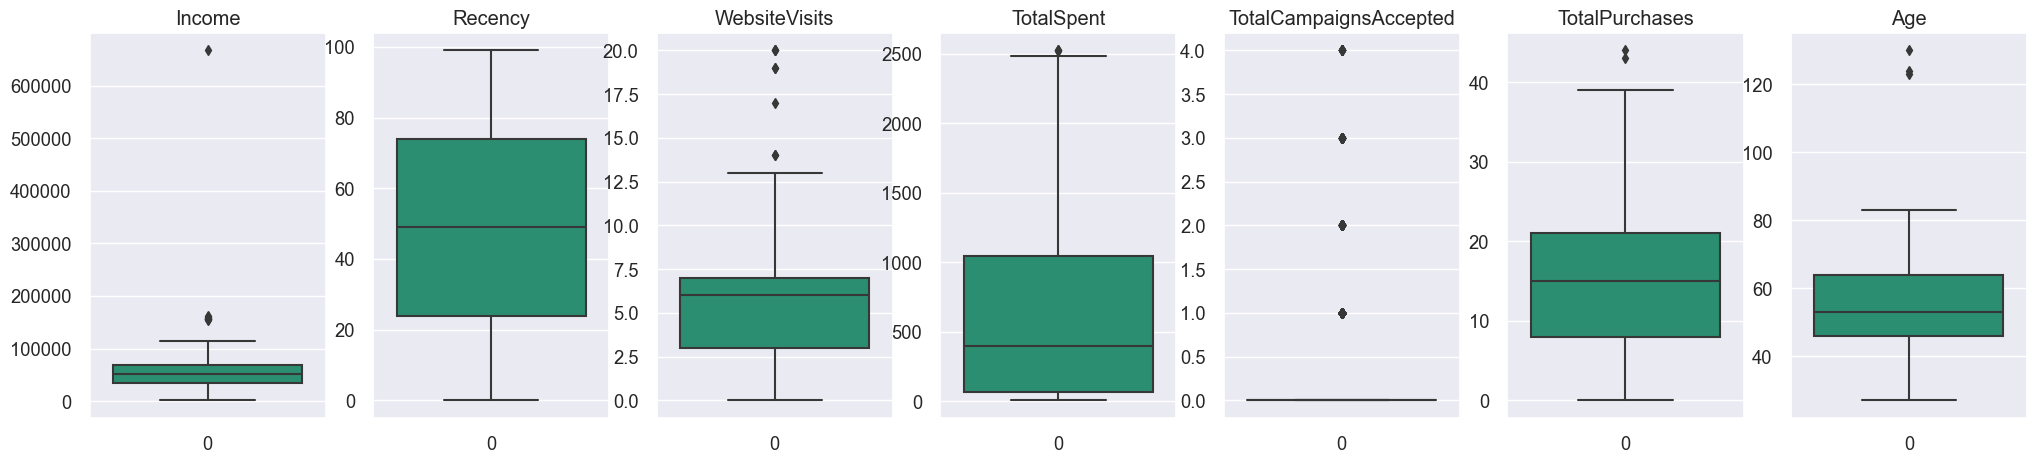

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Income', 'Recency', 'WebsiteVisits', 'TotalSpent', 'TotalCampaignsAccepted', 'TotalPurchases','Age']

fig, axs = plt.subplots(ncols=len(num_cols), figsize=(25,5))

for i, col in enumerate(num_cols):
    sns.boxplot(data=df_Mark[col], ax=axs[i])
    axs[i].set_title(col)

# Outlier detection

In [58]:
for i in df_Mark:
    if df_Mark[i].dtype == 'int64' or df_Mark[i].dtype == 'float64':
        Q1 = df_Mark[i].quantile(0.25)
        Q3 = df_Mark[i].quantile(0.75)
        IQR = Q3 - Q1
        up = Q3 + 1.5*IQR
        low = Q1 - 1.5*IQR

        if df_Mark[(df_Mark[i] > up) | (df_Mark[i] < low)].any(axis=None):
            print(i,"yes")
        else:
            print(i, "no")

Age yes
Income yes
Recency no
WebsiteVisits yes
Complain yes
Response yes
TotalSpent yes
TotalCampaignsAccepted yes
TotalPurchases yes


In [59]:
cols = ['Income', 'Recency', 'WebsiteVisits', 'TotalSpent', 'TotalPurchases', 'Age']

for col in cols:
    Q1 = df_Mark[col].quantile(0.25)
    Q3 = df_Mark[col].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    df_Mark.loc[df_Mark[col] > up_lim, col] = up_lim
    df_Mark.loc[df_Mark[col] < low_lim, col] = low_lim


In [61]:
df_Mark.columns

Index(['Age', 'Education', 'Income', 'Recency', 'WebsiteVisits', 'Complain',
       'Response', 'age_category', 'TotalSpent', 'TotalCampaignsAccepted',
       'Living_Status', 'TotalPurchases'],
      dtype='object')

In [62]:
df_Mark['TotalCampaignsAccepted'].value_counts()

0    1777
1     325
2      83
3      44
4      11
Name: TotalCampaignsAccepted, dtype: int64

In [63]:
for i in df_Mark:
    if df_Mark[i].dtype == 'int64' or df_Mark[i].dtype == 'float64':
        Q1 = df_Mark[i].quantile(0.25)
        Q3 = df_Mark[i].quantile(0.75)
        IQR = Q3 - Q1
        up = Q3 + 1.5*IQR
        low = Q1 - 1.5*IQR

        if df_Mark[(df_Mark[i] > up) | (df_Mark[i] < low)].any(axis=None):
            print(i,"yes")
        else:
            print(i, "no")

Age no
Income no
Recency no
WebsiteVisits no
Complain yes
Response yes
TotalSpent no
TotalCampaignsAccepted yes
TotalPurchases no


**Now Outlier is clean from our dataset**

# Data preprocessing

In [64]:
df_processed = df_Mark.copy()

In [65]:
# Standardize numerical columns
scaler = StandardScaler()
df_processed[num_cols] = scaler.fit_transform(df_processed[num_cols])

# Create dummy variables for categorical columns
cat_cols = ['Education','Living_Status']
df_encoded = pd.get_dummies(df_processed[cat_cols], drop_first=True)

# Combine numerical and encoded categorical columns
df_processed = pd.concat([df_processed[num_cols], df_encoded], axis=1)


In [66]:
df_processed.head()

,Income,Recency,WebsiteVisits,TotalSpent,TotalCampaignsAccepted,TotalPurchases,Age,Education_Postgraduate,Education_Undergraduate,Living_Status_Partner with Children,Living_Status_Partner without Children
0,0.299208,0.307039,0.724452,1.679615,-0.439037,1.322811,1.007064,0,0,0,0
1,-0.264251,-0.383664,-0.127397,-0.961340,-0.439037,-1.155676,1.261969,0,0,0,0
2,0.942978,-0.798086,-0.553322,0.282733,-0.439037,0.801024,0.327318,0,0,0,1
3,-1.205325,-0.798086,0.298528,-0.918154,-0.439037,-0.894783,-1.287080,0,0,1,0
4,0.306613,1.550305,-0.127397,-0.305253,-0.439037,0.540131,-1.032175,1,0,1,0


In [67]:
df_processed.shape

(2240, 11)

# Clustering

In [68]:
score=[]
K=range(1,20)

for i in K:
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(df_processed)
    score.append(kmeans.inertia_)

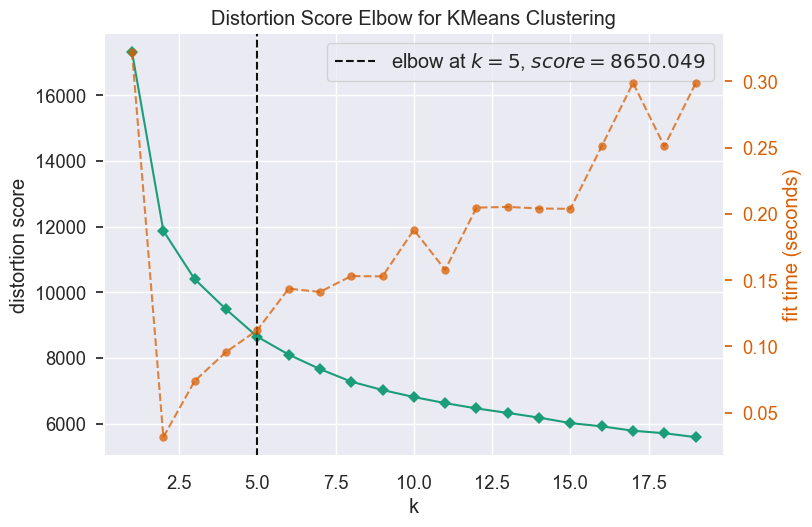

In [69]:
kmeans=KMeans()
visu=KElbowVisualizer(kmeans,k=(1,20))   
visu.fit(df_processed)
visu.poof();

In [92]:
# Fit KMeans with 4 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
kmeans.fit(df_processed)

df_processed['Cluster'] = kmeans.labels_
# Add the cluster labels to the original dataframe
df_Mark['Cluster']= kmeans.labels_

In [93]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_processed, kmeans.labels_)
print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.32324924316023834


* **The average silhouette score ranges from -1 to 1, with 1 being the best score and -1 being the worst score. A score of 0 indicates overlapping clusters.**
* **A score of 0.3 is considered a moderate score indicating that the clusters are somewhat distinct**

In [94]:
# Create separate data frames for each cluster
cluster_0 = df_Mark[df_Mark['Cluster'] == 0]
cluster_1 = df_Mark[df_Mark['Cluster'] == 1]
cluster_2 = df_Mark[df_Mark['Cluster'] == 2]
cluster_3 = df_Mark[df_Mark['Cluster'] == 3]
cluster_4 = df_Mark[df_Mark['Cluster'] == 4]

In [95]:
cluster_0.describe()

,Age,Income,Recency,WebsiteVisits,Complain,Response,TotalSpent,TotalCampaignsAccepted,TotalPurchases,Cluster
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.0
mean,50.356048,34773.647369,24.391823,6.504259,0.013629,0.148211,122.088586,0.107325,8.553663,0.0
std,10.660490,12078.000374,14.984627,1.677364,0.116042,0.355612,127.491734,0.331092,4.033786,0.0
min,27.000000,4023.000000,0.000000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0
25%,43.000000,26315.000000,11.000000,5.000000,0.000000,0.000000,38.000000,0.000000,5.000000,0.0
50%,50.000000,34600.000000,24.000000,7.000000,0.000000,0.000000,68.000000,0.000000,7.000000,0.0
75%,56.000000,43389.000000,37.000000,8.000000,0.000000,0.000000,160.500000,0.000000,11.000000,0.0
max,91.000000,69139.000000,56.000000,13.000000,1.000000,1.000000,684.000000,2.000000,25.000000,0.0


In [96]:
cluster_1.describe()

,Age,Income,Recency,WebsiteVisits,Complain,Response,TotalSpent,TotalCampaignsAccepted,TotalPurchases,Cluster
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.0
mean,60.057495,60846.351140,47.236140,5.850103,0.008214,0.141684,904.872690,0.227926,22.986653,1.0
std,9.613989,9502.822385,28.092434,1.530256,0.090348,0.349084,378.746617,0.424798,4.584857,0.0
min,33.000000,2447.000000,0.000000,1.000000,0.000000,0.000000,260.000000,0.000000,12.000000,1.0
25%,52.000000,54991.000000,24.500000,5.000000,0.000000,0.000000,604.500000,0.000000,20.000000,1.0
50%,60.000000,60934.000000,48.000000,6.000000,0.000000,0.000000,869.000000,0.000000,23.000000,1.0
75%,68.000000,67109.000000,69.000000,7.000000,0.000000,0.000000,1131.500000,0.000000,26.000000,1.0
max,80.000000,86358.000000,99.000000,9.000000,1.000000,1.000000,2440.000000,2.000000,40.500000,1.0


In [97]:
cluster_2.describe()

,Age,Income,Recency,WebsiteVisits,Complain,Response,TotalSpent,TotalCampaignsAccepted,TotalPurchases,Cluster
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.0
mean,53.217778,79881.460012,49.031111,3.271111,0.004444,0.506667,1612.350556,1.884444,21.017778,2.0
std,13.590360,10393.517304,28.965095,2.044660,0.066667,0.501070,409.066370,0.888909,4.011106,0.0
min,28.000000,48192.000000,1.000000,1.000000,0.000000,0.000000,416.000000,1.000000,10.000000,2.0
25%,42.000000,74116.000000,25.000000,2.000000,0.000000,0.000000,1371.000000,1.000000,18.000000,2.0
50%,52.000000,80950.000000,47.000000,3.000000,0.000000,1.000000,1650.000000,2.000000,21.000000,2.0
75%,64.000000,85844.000000,73.000000,4.000000,0.000000,1.000000,1902.000000,2.000000,24.000000,2.0
max,91.000000,105471.000000,99.000000,9.000000,1.000000,1.000000,2510.625000,4.000000,32.000000,2.0


In [98]:
cluster_3.describe()

,Age,Income,Recency,WebsiteVisits,Complain,Response,TotalSpent,TotalCampaignsAccepted,TotalPurchases,Cluster
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.0
mean,54.489362,73329.848419,50.882979,2.148936,0.007979,0.101064,1075.029255,0.071809,19.049202,3.0
std,12.662170,11383.587716,28.615280,1.097463,0.089085,0.301815,429.440811,0.258515,4.850385,0.0
min,28.000000,7144.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,3.0
25%,45.000000,66664.000000,27.000000,1.000000,0.000000,0.000000,817.750000,0.000000,16.000000,3.0
50%,53.000000,72306.000000,54.000000,2.000000,0.000000,0.000000,1064.000000,0.000000,19.000000,3.0
75%,65.000000,79474.250000,74.000000,3.000000,0.000000,0.000000,1348.000000,0.000000,22.000000,3.0
max,80.000000,117416.250000,99.000000,6.000000,1.000000,1.000000,2126.000000,1.000000,40.500000,3.0


In [99]:
cluster_4.describe()

,Age,Income,Recency,WebsiteVisits,Complain,Response,TotalSpent,TotalCampaignsAccepted,TotalPurchases,Cluster
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.0
mean,53.136283,36479.082325,75.254867,6.476106,0.008850,0.046018,137.375221,0.074336,9.164602,4.0
std,11.219008,12267.848786,14.602129,1.752874,0.093738,0.209709,135.997734,0.262550,4.313859,0.0
min,27.000000,1730.000000,45.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,4.0
25%,45.000000,27922.000000,64.000000,5.000000,0.000000,0.000000,43.000000,0.000000,6.000000,4.0
50%,52.000000,36997.000000,77.000000,7.000000,0.000000,0.000000,78.000000,0.000000,8.000000,4.0
75%,62.000000,45989.000000,87.000000,8.000000,0.000000,0.000000,194.000000,0.000000,12.000000,4.0
max,91.000000,62994.000000,99.000000,13.000000,1.000000,1.000000,839.000000,1.000000,27.000000,4.0


* **Cluster 0:**
* Age: The age of the customer, ranging from 27 to 91 years old, with an average age of 50 years old.
* Income: The annual income of the customer, ranging from 4023 to 69139 dollars, with an average income of 34773 dollars.
* Recency: The number of days since the customer's last purchase, ranging from 0 to 56 days, with an average of 24 days.
* WebsiteVisits: The number of visits the customer made to the company's website, ranging from 1 to 13 visits, with an average of 6 visits.
* Complain: A binary variable indicating whether the customer has ever made a complaint, with 0 indicating no complaint and 1 indicating a complaint.
* Response: A binary variable indicating whether the customer responded to the company's marketing campaigns, with 0 indicating no response and 1 indicating a response.
* TotalSpent: The total amount of money the customer has spent on the company's products, ranging from 6 to 684 dollars, with an average of 122 dollars.
* TotalCampaignsAccepted: The total number of marketing campaigns the customer has accepted, ranging from 0 to 2 campaigns, with an average of 0.1 campaigns.
* TotalPurchases: The total number of purchases the customer has made, ranging from 0 to 25 purchases, with an average of 8.5 purchases.

* **Cluster 1:**

* Age: The average age of customers in this group is 60 years old, with a range from 33 to 80 years old. The median age is 60 years old.
* Income: The average income of customers in this group is 60,846 USD, with a standard deviation of 9,502 USD. The range of incomes is from 2,447 USD to 86,358 USD.
* Recency: The average time since the last purchase made by customers in this group is 47.24 days, with a range from 0 to 99 days. The median time is 48 days.
* WebsiteVisits: The average number of website visits made by customers in this group is 5.85, with a standard deviation of 1.53. The range is from 1 to 9 website visits.
* Complain: Only a small percentage (0.82%) of customers in this group have filed a complaint.
* Response: About 14.17% of customers in this group have responded to marketing campaigns.
* TotalSpent: The average total amount spent by customers in this group is 904.87 USD, with a standard deviation of 378.75 USD. The range is from 260 USD to 2,440 USD.
* TotalCampaignsAccepted: The average number of marketing campaigns accepted by customers in this group is 0.23, with a range from 0 to 2.
* TotalPurchases: The average total number of purchases made by customers in this group is 22.99, with a standard deviation of 4.58. The range is from 12 to 40.5 purchases.

* **Cluster 2:**
* Age: mean of 53.22 years old, with a range from 28 to 91 years old.
* Income: mean of 79,881.46 USD, with a range from 48,192 USD to 105,471 USD.
* Recency: mean of 49.03 days, with a range from 1 to 99 days.
* WebsiteVisits: mean of 3.27 website visits, with a range from 1 to 9 website visits.
* Complain: only 0.44% of customers in this group filed a complaint.
* Response: about 50.67% of customers in this group responded to marketing campaigns.
* TotalSpent: mean of 1612.35 USD, with a range from 416 USD to 2510.63 USD.
* TotalCampaignsAccepted: mean of 1.88 campaigns accepted, with a range from 1 to 4 campaigns.
* TotalPurchases: mean of 21.02 purchases, with a range from 10 to 32 purchases.

* **Cluster 3:**
* There are 376 observations in the dataset.
* The mean age of the customers is 54.49 years.
* The mean income of the customers is 73,329.85.
* The average time since the last purchase is 50.88 days.
* The average number of website visits is 2.15.
* Only a small proportion of customers have made a complaint (0.8%) or responded to a campaign (10.1%).
* The average total amount spent by customers is 1,075.03.
* On average, customers accepted less than one campaign (0.07).
* The average total number of purchases made by customers is 19.05.

* **Cluster 4:**
* Age: The average age of customers in the dataset is 53 years old, with a minimum age of 27 and a maximum age of 91. The standard deviation is 11.22 years.
* Income: The average income of customers in the dataset is 36,479, with a minimum income of 1,730 and a maximum income of 62,994. The standard deviation is 12,267.
* Recency: The average number of days since the customer's last purchase is 75 days, with a minimum of 45 days and a maximum of 99 days. The standard deviation is 14.60 days.
* WebsiteVisits: The average number of visits to the company's website is 6.48, with a minimum of 1 visit and a maximum of 13 visits. The standard deviation is 1.75 visits.
* Complain: Only a very small proportion of customers (0.88%) have made a complaint.
* Response: A small proportion of customers (4.6%) have responded to a marketing campaign.
* TotalSpent: The average total amount spent by customers is 137.38, with a minimum of 5 and a maximum of 839. The standard deviation is 135.99.
* TotalCampaignsAccepted: On average, customers have accepted less than one marketing campaign (0.07), with a maximum of 1 campaign. The standard deviation is 0.26 campaigns.
* TotalPurchases: The average number of purchases made by customers is 9.16, with a minimum of 0 purchases and a maximum of 27 purchases. The standard deviation is 4.31 purchases.


# Evaluating models

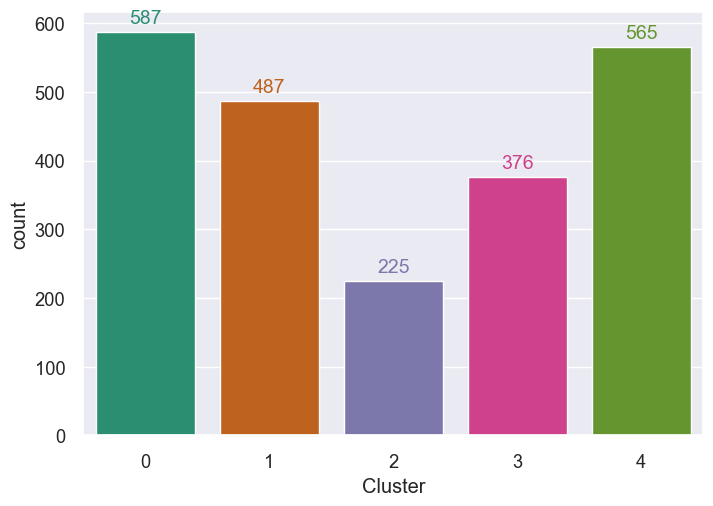

In [101]:
import seaborn as sns

ax=sns.countplot(x='Cluster', data=df_processed)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.show()

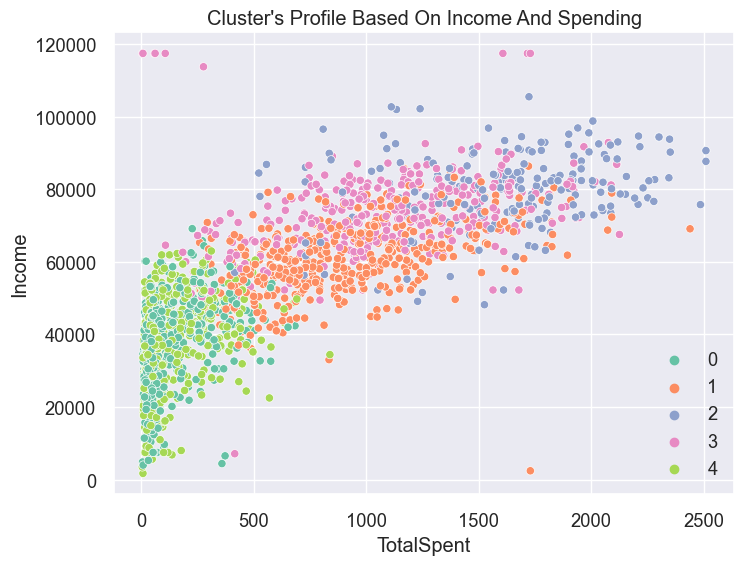

In [102]:
plt.figure(figsize=(8,6))
pl = sns.scatterplot(data=df_Mark, x='TotalSpent', y='Income', hue='Cluster', palette='Set2')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()


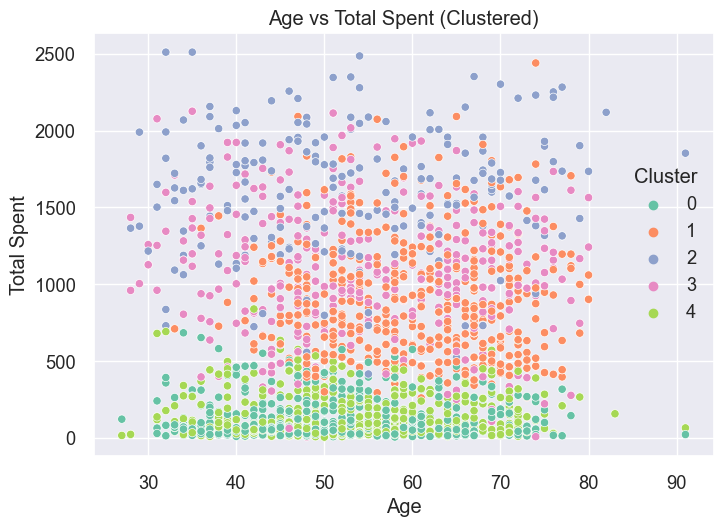

In [103]:
# Create scatter plot with hue based on cluster column
sns.scatterplot(data=df_Mark, x='Age', y='TotalSpent', hue='Cluster', palette='Set2')

# Add title and axis labels
plt.title('Age vs Total Spent (Clustered)')
plt.xlabel('Age')
plt.ylabel('Total Spent')

# Show the plot
plt.show()

<Figure size 1000x700 with 0 Axes>

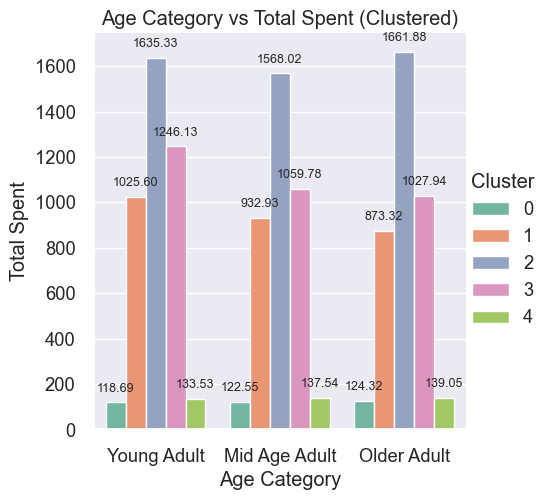

In [104]:
# Group data by age category and cluster, and calculate mean TotalSpent
spending = df_Mark.groupby(['age_category', 'Cluster'])['TotalSpent'].mean().reset_index()

# Create bar plot with hue based on cluster column
plt.figure(figsize=(10,7),facecolor='yellow')
g = sns.catplot(data=spending, x='age_category', y='TotalSpent', hue='Cluster', kind='bar', palette='Set2')

# Add labels to the bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), 
                    textcoords = 'offset points', fontsize=9)

# Add title and axis labels
plt.title('Age Category vs Total Spent (Clustered)')
plt.xlabel('Age Category')
plt.ylabel('Total Spent')

# Show the plot
plt.show()

<Figure size 1500x800 with 0 Axes>

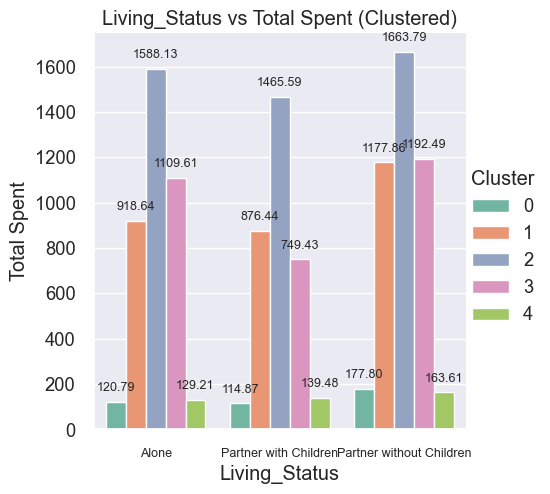

In [107]:
# Group data by age category and cluster, and calculate mean TotalSpent
spending = df_Mark.groupby(['Living_Status', 'Cluster'])['TotalSpent'].mean().reset_index()

# Create bar plot with hue based on cluster column
plt.figure(figsize=(15,8),facecolor='yellow')
g = sns.catplot(data=spending, x='Living_Status', y='TotalSpent', hue='Cluster', kind='bar', palette='Set2')
g.set_xticklabels(fontsize=9)
# Add labels to the bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), 
                    textcoords = 'offset points', fontsize=9)

# Add title and axis labels
plt.title('Living_Status vs Total Spent (Clustered)')
plt.xlabel('Living_Status')
plt.ylabel('Total Spent')

# Show the plot
plt.show()

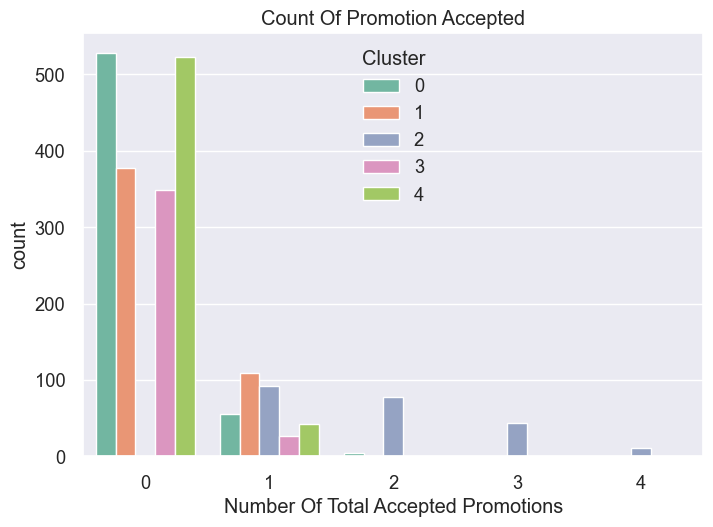

In [110]:
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df_Mark["TotalCampaignsAccepted"],hue=df_Mark["Cluster"], palette= 'Set2')
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

In [112]:
cluster_0.to_csv('cluster_0.csv', index=False)
cluster_1.to_csv('cluster_1.csv', index=False)
cluster_2.to_csv('cluster_2.csv', index=False)
cluster_3.to_csv('cluster_3.csv', index=False)
cluster_4.to_csv('cluster_4.csv', index=False)
